#### era5 analysis

In [67]:
import glob

In [69]:
pr_files_era5 = sorted(glob.glob('/g/data/rt52/era5/single-levels/reanalysis/tp/202[0-1]/tp_era5_oper_sfc_*.nc'))
pr_files_era5

['/g/data/rt52/era5/single-levels/reanalysis/tp/2020/tp_era5_oper_sfc_20200101-20200131.nc',
 '/g/data/rt52/era5/single-levels/reanalysis/tp/2020/tp_era5_oper_sfc_20200201-20200229.nc',
 '/g/data/rt52/era5/single-levels/reanalysis/tp/2020/tp_era5_oper_sfc_20200301-20200331.nc',
 '/g/data/rt52/era5/single-levels/reanalysis/tp/2020/tp_era5_oper_sfc_20200401-20200430.nc',
 '/g/data/rt52/era5/single-levels/reanalysis/tp/2020/tp_era5_oper_sfc_20200501-20200531.nc',
 '/g/data/rt52/era5/single-levels/reanalysis/tp/2020/tp_era5_oper_sfc_20200601-20200630.nc',
 '/g/data/rt52/era5/single-levels/reanalysis/tp/2020/tp_era5_oper_sfc_20200701-20200731.nc',
 '/g/data/rt52/era5/single-levels/reanalysis/tp/2020/tp_era5_oper_sfc_20200801-20200831.nc',
 '/g/data/rt52/era5/single-levels/reanalysis/tp/2020/tp_era5_oper_sfc_20200901-20200930.nc',
 '/g/data/rt52/era5/single-levels/reanalysis/tp/2020/tp_era5_oper_sfc_20201001-20201031.nc',
 '/g/data/rt52/era5/single-levels/reanalysis/tp/2020/tp_era5_oper_sfc_

In [76]:
pr_era = xr.open_mfdataset(pr_files_era5, combine = 'nested', concat_dim = 'time').sel(time = slice('2020-01-01', '2021-03-01'))
with ProgressBar():
    pr_era_daily = pr_era['tp'].coarsen(time = 24, boundary='trim').sum('time').load() # Calculate monthly mean.
pr_era_daily

[########################################] | 100% Completed | 145.73 s


<xarray.DataArray 'tp' (time: 426, latitude: 721, longitude: 1440)> Size: 4GB
array([[[1.87086822e-04, 1.87086822e-04, 1.87086822e-04, ...,
         1.87086822e-04, 1.87086822e-04, 1.87086822e-04],
        [2.04094715e-04, 2.04094715e-04, 2.05309565e-04, ...,
         2.02879866e-04, 2.04094715e-04, 2.04094715e-04],
        [1.98020468e-04, 2.00450167e-04, 2.05309565e-04, ...,
         1.95590769e-04, 1.95590769e-04, 1.96805618e-04],
        ...,
        [4.37345818e-05, 4.37345818e-05, 4.37345818e-05, ...,
         4.49494313e-05, 4.49494313e-05, 4.37345818e-05],
        [3.64454848e-05, 3.64454848e-05, 3.64454848e-05, ...,
         3.64454848e-05, 3.64454848e-05, 3.64454848e-05],
        [8.50394646e-06, 8.50394646e-06, 8.50394646e-06, ...,
         8.50394646e-06, 8.50394646e-06, 8.50394646e-06]],

       [[2.18672909e-05, 2.18672909e-05, 2.18672909e-05, ...,
         2.18672909e-05, 2.18672909e-05, 2.18672909e-05],
        [2.91563879e-05, 2.91563879e-05, 2.91563879e-05, ...,
         2.91563879e-05, 2.91563879e-05, 2.91563879e-05],
        [4.00900333e-05, 4.00900333e-05, 3.64454848e-05, ...,
         4.00900333e-05, 4.00900333e-05, 4.00900333e-05],
...
         6.48630673e-05, 6.48630673e-05, 6.60213363e-05],
        [4.05394170e-05, 4.05394170e-05, 4.05394170e-05, ...,
         3.93811480e-05, 4.05394170e-05, 4.05394170e-05],
        [1.04244215e-05, 1.04244215e-05, 1.04244215e-05, ...,
         1.04244215e-05, 1.04244215e-05, 1.04244215e-05]],

       [[1.11236614e-04, 1.11236614e-04, 1.11236614e-04, ...,
         1.11236614e-04, 1.11236614e-04, 1.11236614e-04],
        [9.64706919e-05, 9.74550868e-05, 9.74550868e-05, ...,
         9.64706919e-05, 9.64706919e-05, 9.64706919e-05],
        [8.66267438e-05, 8.66267438e-05, 8.66267438e-05, ...,
         8.76111386e-05, 8.76111386e-05, 8.66267438e-05],
        ...,
        [4.92197408e-06, 4.92197408e-06, 4.92197408e-06, ...,
         4.92197408e-06, 4.92197408e-06, 4.92197408e-06],
        [9.84394816e-07, 9.84394816e-07, 9.84394816e-07, ...,
         9.84394816e-07, 9.84394816e-07, 9.84394816e-07],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]]],
      shape=(426, 721, 1440))
Coordinates:
  * longitude  (longitude) float32 6kB -180.0 -179.8 -179.5 ... 179.5 179.8
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 3kB 2020-01-01T11:30:00 ... 2021-03-01T1...
Attributes:
    units:      m
    long_name:  Total precipitation

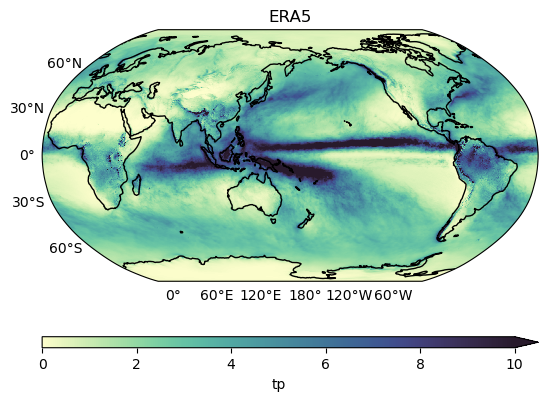

In [86]:
ax = plt.axes(projection=ccrs.Robinson(central_longitude=160))
(pr_era_daily.mean('time')*1000).plot(vmax=10, transform=ccrs.PlateCarree(central_longitude=0), cmap=cmocean.cm.deep, cbar_kwargs=dict(orientation='horizontal', aspect=45, shrink=1.0))
gl = ax.gridlines(alpha=0., draw_labels=True)
ax.coastlines()
ax.set_title('ERA5')
gl.top_labels=False
gl.right_labels=False

NameError: name 'icon_daily' is not defined

#### regridding to era5 for daily data from high-res models

In [24]:
def get_nn_lon_lat_index(nside, lons, lats):
    """
    nside: integer, power of 2. The return of hp.get_nside()
    lons: uniques values of longitudes
    lats: uniques values of latitudes
    returns: array with the HEALPix cells that are closest to the lon/lat grid
    """
    lons2, lats2 = np.meshgrid(lons, lats)
    return xr.DataArray(
        hp.ang2pix(nside, lons2, lats2, nest = True, lonlat = True),
        coords=[("lat", lats), ("lon", lons)],
    )

In [ ]:
# Find the HEALPix pixels that are closest to the ERA5 grid

# longitudes and latitudes for the ERA5 grid
lon = pr_era_daily['longitude'].values
lat = pr_era_daily['latitude'].values

# nside for um simulation, it should be equal to 2**zoom
this_nside = hp.get_nside(icon)

cells = get_nn_lon_lat_index(this_nside, lon, lat) 

cells